# <font style="color:rgb(50,120,229)">Opening and Closing</font>
As discussed in the video, we can combine erosion and dilation operations to perform some interesting operations on binary images. We can remove small black or white spots from a binary image. For example, we know that erosion removes white region and dilation adds white region. Thus, if we want to **remove small white spots**, we should perform **erosion followed by dilation** so that the smaller white spots are removed, whereas the bigger white blobs are unchanged. Similarly you can **remove black spots using dilation followed by erosion**.

Again, weird as it may sound, these operations are also given some names : **Opening and Closing**.

**Opening** refers Erosion followed by Dilation and these operations is used for clearing **white blobs** and 

**Closing** refers Dilation followed by Erosion and are used for clearing **black holes**

In this section, we will discuss how to use opening and closing operations on binary images. 

## <font style="color:rgb(50,120,229)">Opening and Closing using OpenCV</font>

Opening and Closing operations can be performed by combining erosion and dilation. It can also be done using special OpenCV functions

In OpenCV, the opening and closing operations are implemented using **MorphologyEx** function.

To chose between the opening and closing operation to be performed we specify an argument in the function [**`MorphologyEx`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html?fbclid=IwAR1GtoDsIv4Fi8o7vrZ8SGb3bb1uiU_Nyt94fc9J2sHKF7FlbDNT1fq-kI0#ga67493776e3ad1a3df63883829375201f) definition. The argument for opening operation and closing operations are [**`MORPH_OPEN`**] and [**`MORPH_CLOSE`**] respectively.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

### <font style="color:rgb(50,120,229)">Opening</font>

```python:
imageMorphOpened = cv2.morphologyEx( src, cv2.MORPH_OPEN, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]] )
```

### <font style="color:rgb(50,120,229)">Closing</font>

```python:
imageMorphClosed = cv2.morphologyEx( src, cv2.MORPH_CLOSE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]] )
```

**Parameters**
- **`src`**	Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	Destination image of the same size and type as source image.
- **`op`**	Type of a morphological operation
- **`kernel`**	Structuring element. It can be created using getStructuringElement.
- **`anchor`**	Anchor position with the kernel. Negative values mean that the anchor is at the kernel center.
- **`iterations`**	Number of times erosion and dilation are applied.
- **`borderType`**	Pixel extrapolation method.
- **`borderValue`**	Border value in case of a constant border. The default value has a special meaning.

**<font style="color:rgb(255,0,0)">Note:</font>** In the functions above, the parameter ‘iterations’ is optional and if not mentioned the default value is taken to be 1. In case, we need to run the opening/closing function more than once, we specify the number of iterations in the **MorphologyEx** function call statement.

We will discuss different methods for performing Opening and Closing operations : 
1. Using Dilation and Erosion Operations
1. Using `MorphologyEx` function

## <font style="color:rgb(50,120,229)">Import Libraries</font>

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Load Image for Opening Operation</font>

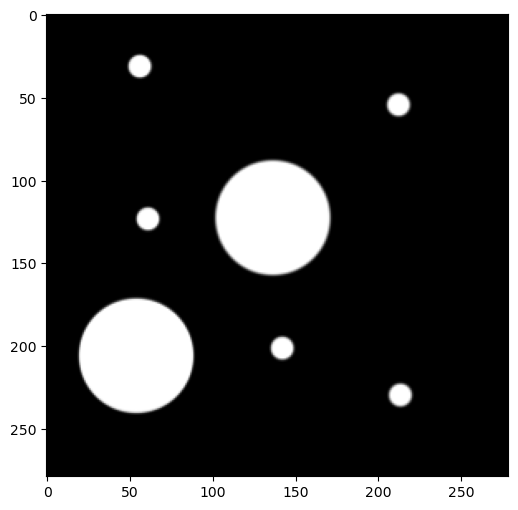

In [3]:
imageName = DATA_PATH + "images/opening.png"
# Image taken as input
image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")
plt.imshow(image)

**Objective:** We want to remove the small white blobs while keeping the the bigger blobs intact

## <font style="color:rgb(50,120,229)">Opening : Method 1 - Using combination of Erosion and Dilation </font>
In this method, we will use a kernel to perform the opening operation by Erosion followed by Dilation. We will use a Ellipse structuring element for the operation.

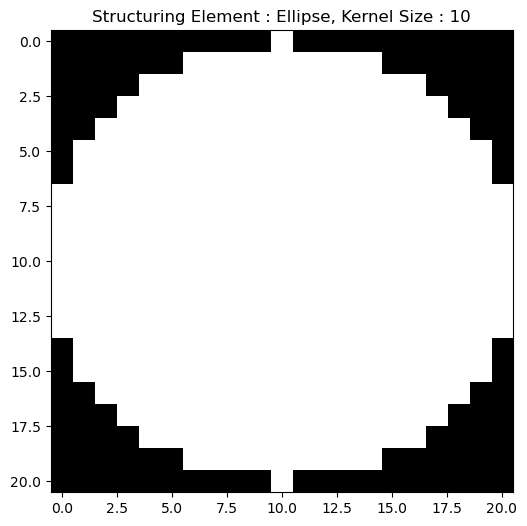

In [4]:
# Specify Kernel Size
kernelSize = 10

# Create the Kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*kernelSize+1, 2*kernelSize+1),
                                    (kernelSize, kernelSize))

# Perform Erosion
imEroded = cv2.erode(image, element, iterations=1)
# Perform Dilation
imOpen = cv2.dilate(imEroded, element, iterations=1)

# Display Kernel
plt.imshow(element);plt.title("Structuring Element : Ellipse, Kernel Size : {}".format(kernelSize));plt.show()


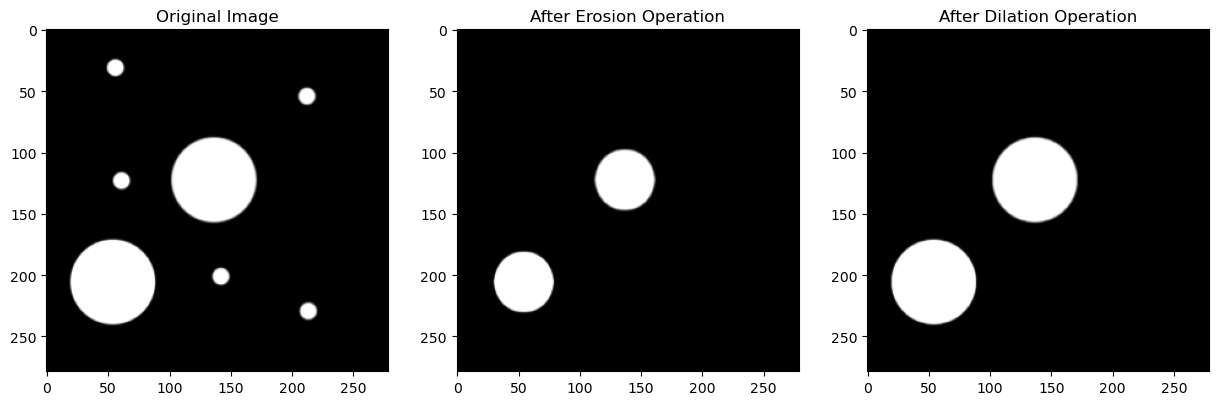

In [5]:
# Display Output
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imEroded,cmap='gray');plt.title("After Erosion Operation")
plt.subplot(133);plt.imshow(imOpen,cmap='gray');plt.title("After Dilation Operation");

#### <font style="color:rgb(8,133,37)">We can see that all the small blobs are removed and the bigger blobs remain same. </font>

## <font style="color:rgb(50,120,229)">Opening : Method 2 - Using MorphologyEx function </font>

In [6]:
# Get structuring element/kernel which will be used 
# for opening operation
openingSize = 3

# Selecting a elliptical kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, 
            (2 * openingSize + 1, 2 * openingSize + 1),
            (openingSize,openingSize))

Applying erosion followed by dilation on image by using morphologyEx function and specifying **`MORPH_OPEN`** tag(denotes opening operation). In some cases, it may be required to implement a particular morphological operation more than once. In those cases, we need to define the number of iterations required.

Text(0.5, 1.0, 'After Opening Operation')

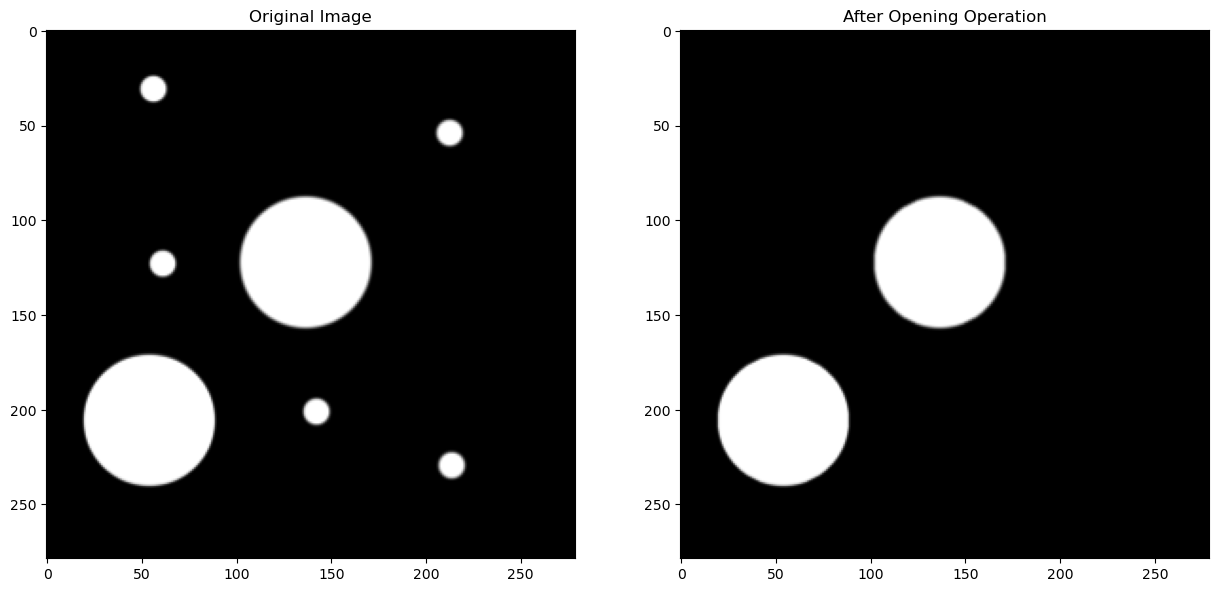

In [7]:
imageMorphOpened = cv2.morphologyEx(image, cv2.MORPH_OPEN, 
                        element,iterations=3)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageMorphOpened);plt.title("After Opening Operation")

## <font style="color:rgb(50,120,229)">Load Image for Closing Operation</font>

In [8]:
imageName = DATA_PATH + "images/closing.png"
# Image taken as input
image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

**Objective:** We want to remove the small black spots while keeping the the bigger black hole intact

## <font style="color:rgb(50,120,229)">Closing : Method 1 - Using combination of Dilation and Erosion </font>
In this method, we will use a kernel to perform the opening operation by Dilation followed by Erosion. We will use a Ellipse structuring element for the operation.

In [9]:
# Specify Kernel Size
kernelSize = 10

# Create Kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*kernelSize+1, 2*kernelSize+1),
                                    (kernelSize, kernelSize))

# Perform Dilation
imDilated = cv2.dilate(image, element)
# Perform Erosion
imClose = cv2.erode(imDilated, element)


Text(0.5, 1.0, 'After Erosion Operation')

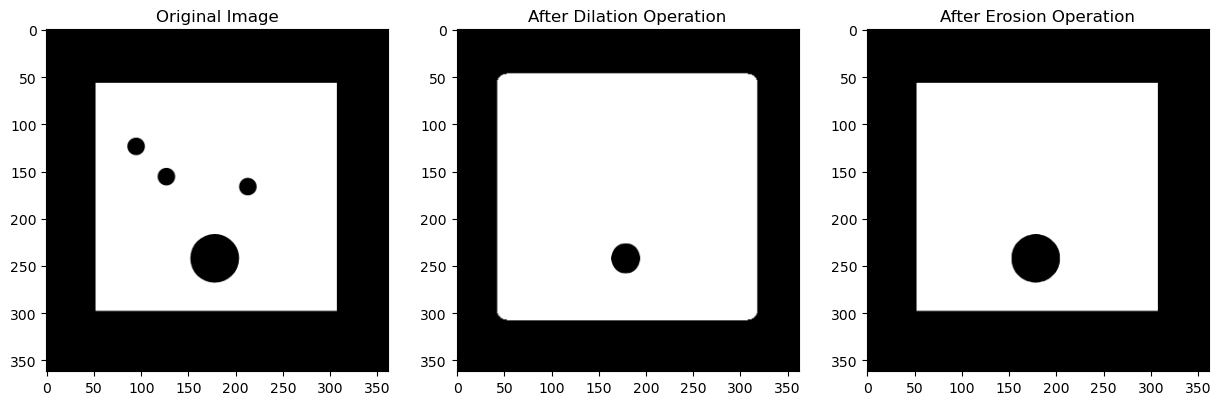

In [10]:
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imDilated,cmap='gray');plt.title("After Dilation Operation")
plt.subplot(133);plt.imshow(imClose,cmap='gray');plt.title("After Erosion Operation")

#### <font style="color:rgb(8,133,37)">We can see that all the small holes are removed and the bigger holes remain same. </font>

## <font style="color:rgb(50,120,229)">Closing : Method 2 - Using MorphologyEx function </font>

In [25]:
# Get structuring element/kernel 
# which will be used for closing operation
closingSize = 10

# Selecting an elliptical kernel 
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
            (2 * closingSize + 1, 2 * closingSize + 1),
            (closingSize,closingSize))

Applying dilation followed by closing on image by using morphologyEx function and specifying **`MORPH_CLOSE`** tag(denotes closing operation)

Text(0.5, 1.0, 'After Closing Operation')

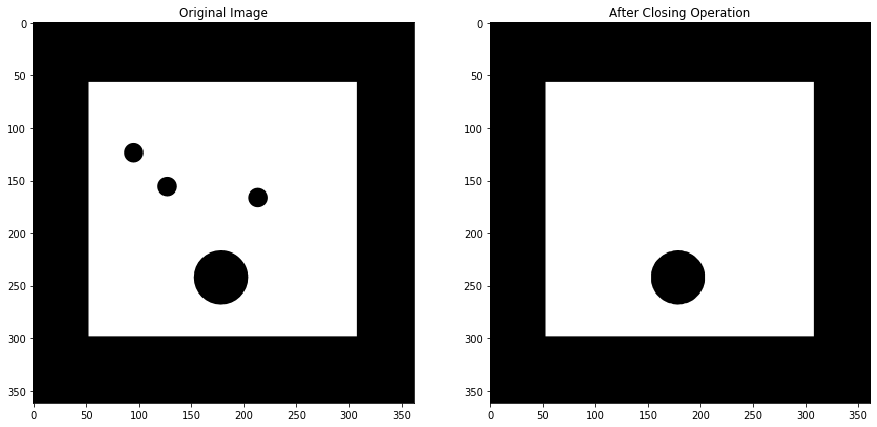

In [26]:
imageMorphClosed = cv2.morphologyEx(image,
                                    cv2.MORPH_CLOSE, element)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageMorphClosed,cmap='gray');plt.title("After Closing Operation")